# Photonic Band Diagram Calculation with MPB and Custom Rust Lattice Library

## 1. Install MPB Solver

In [ ]:
# Install meep and required dependencies
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ Successfully installed {package}")
    except subprocess.CalledProcessError as e:
        print(f"✗ Failed to install {package}: {e}")

# Install required packages
packages = [
    "pymeep",        # Meep Python bindings (full electromagnetic solver)
    "numpy",          # Numerical computing
    "matplotlib",     # Plotting
    "scipy",          # Scientific computing
    "h5py"            # HDF5 file format (used by Meep)
]

print("Installing required packages for Meep electromagnetic simulations...")
for package in packages:
    install_package(package)

print("\nInstallation complete!")

Installing required packages for Meep electromagnetic simulations...


ERROR: Could not find a version that satisfies the requirement pymeep (from versions: none)
ERROR: No matching distribution found for pymeep


✗ Failed to install pymeep: Command '['/home/renlephy/.local/share/mamba/envs/basics/bin/python', '-m', 'pip', 'install', 'pymeep']' returned non-zero exit status 1.
✓ Successfully installed numpy
✓ Successfully installed numpy
✓ Successfully installed matplotlib
✓ Successfully installed matplotlib
✓ Successfully installed scipy
✓ Successfully installed scipy
✓ Successfully installed h5py

Installation complete!
Note: If pymeeus fails to install, you may need to install Meep system-wide first:
  - On Ubuntu/Debian: sudo apt-get install meep libmeeus-dev
  - On macOS: brew install meep
  - Or compile from source: https://meep.readthedocs.io/en/latest/installation/

Meep provides the full electromagnetic simulation pipeline including:
  - Flexible geometry creation with meep.Geometry
  - Advanced material assignment with meep.Medium
  - Integrated MPB solver for band structure calculations
  - Support for anisotropic and dispersive materials
✓ Successfully installed h5py

Installation co

## 2. Import Custom Rust Port and Required Libraries

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
import math
import sys
import os

# Import meep for electromagnetic simulations and band structure calculations
try:
    import meep as mp  # Full Meep package
    from meep import mpb  # MPB for band structure calculations
    MEEP_AVAILABLE = True
    print("Meep is available - will run full electromagnetic simulations")
except ImportError:
    MEEP_AVAILABLE = False
    print("Meep not available - will use simulated data for demonstration")
    print("To install Meep: https://meep.readthedocs.io/en/latest/installation/")

# Import our custom Rust lattice library
try:
    import moire_lattice_py as msl
    print("Custom Rust lattice library imported successfully")
except ImportError as e:
    print(f"Failed to import custom lattice library: {e}")
    print("Please ensure the Python package is built with: maturin develop")
    sys.exit(1)

print("Setting up visualization parameters...")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

print("All imports completed!")
print(f"Meep available: {MEEP_AVAILABLE}")

✓ Meep is available - will run full electromagnetic simulations
✓ Custom Rust lattice library imported successfully
Setting up visualization parameters...
All imports completed!
Meep available: True


## 3. Create Hexagonal Lattice and Print Stats

In [3]:
# Create a hexagonal lattice using our Rust library
print("Creating hexagonal lattice...")

# Define lattice parameters
lattice_constant = 1.0  # Lattice constant in μm
rod_radius = 0.48 * lattice_constant  # Rod radius (20% of lattice constant)

# Create hexagonal lattice
hexagonal_lattice = msl.create_hexagonal_lattice(lattice_constant)

# Get lattice vectors
lattice_vectors = hexagonal_lattice.lattice_vectors()
print(f"Lattice vectors:")
for i, vec in enumerate(lattice_vectors):
    print(f"  a{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}]")

# Get reciprocal lattice vectors
reciprocal_vectors = hexagonal_lattice.reciprocal_vectors()
print(f"\nReciprocal lattice vectors:")
for i, vec in enumerate(reciprocal_vectors):
    print(f"  b{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}]")

# Get high symmetry points for band structure calculation
symmetry_points_list = hexagonal_lattice.get_high_symmetry_points()
symmetry_points = {}
for name, point in symmetry_points_list:
    symmetry_points[name] = (point[0], point[1])  # Convert from 3D to 2D

print(f"\nHigh symmetry points in reciprocal space:")
for name, point in symmetry_points.items():
    print(f"  {name}: [{point[0]:.3f}, {point[1]:.3f}]")

# Calculate Brillouin zone area for normalization
brillouin_area = hexagonal_lattice.unit_cell_area()
print(f"\nBrillouin zone area: {brillouin_area:.3f}")

# Define material parameters for photonic crystal
print(f"\nMaterial parameters:")
print(f"  Rod radius: {rod_radius:.3f} μm")
print(f"  Background permittivity (air): 1.0")
print(f"  Rod permittivity (dielectric): 12.0")  # High-index material like GaAs
epsilon_background = 13.0
epsilon_rod = 1.0

Creating hexagonal lattice...
Lattice vectors:
  a1 = [1.000, 0.000]
  a2 = [-0.500, 0.866]

Reciprocal lattice vectors:
  b1 = [6.283, 3.628]
  b2 = [-0.000, 7.255]

High symmetry points in reciprocal space:
  K: [2.094, 3.628]
  M: [3.142, 1.814]
  Γ: [0.000, 0.000]

Brillouin zone area: 0.866

Material parameters:
  Rod radius: 0.480 μm
  Background permittivity (air): 1.0
  Rod permittivity (dielectric): 12.0


## 4. Plot Reciprocal Lattice, Brillouin Zone, and High Symmetry Points

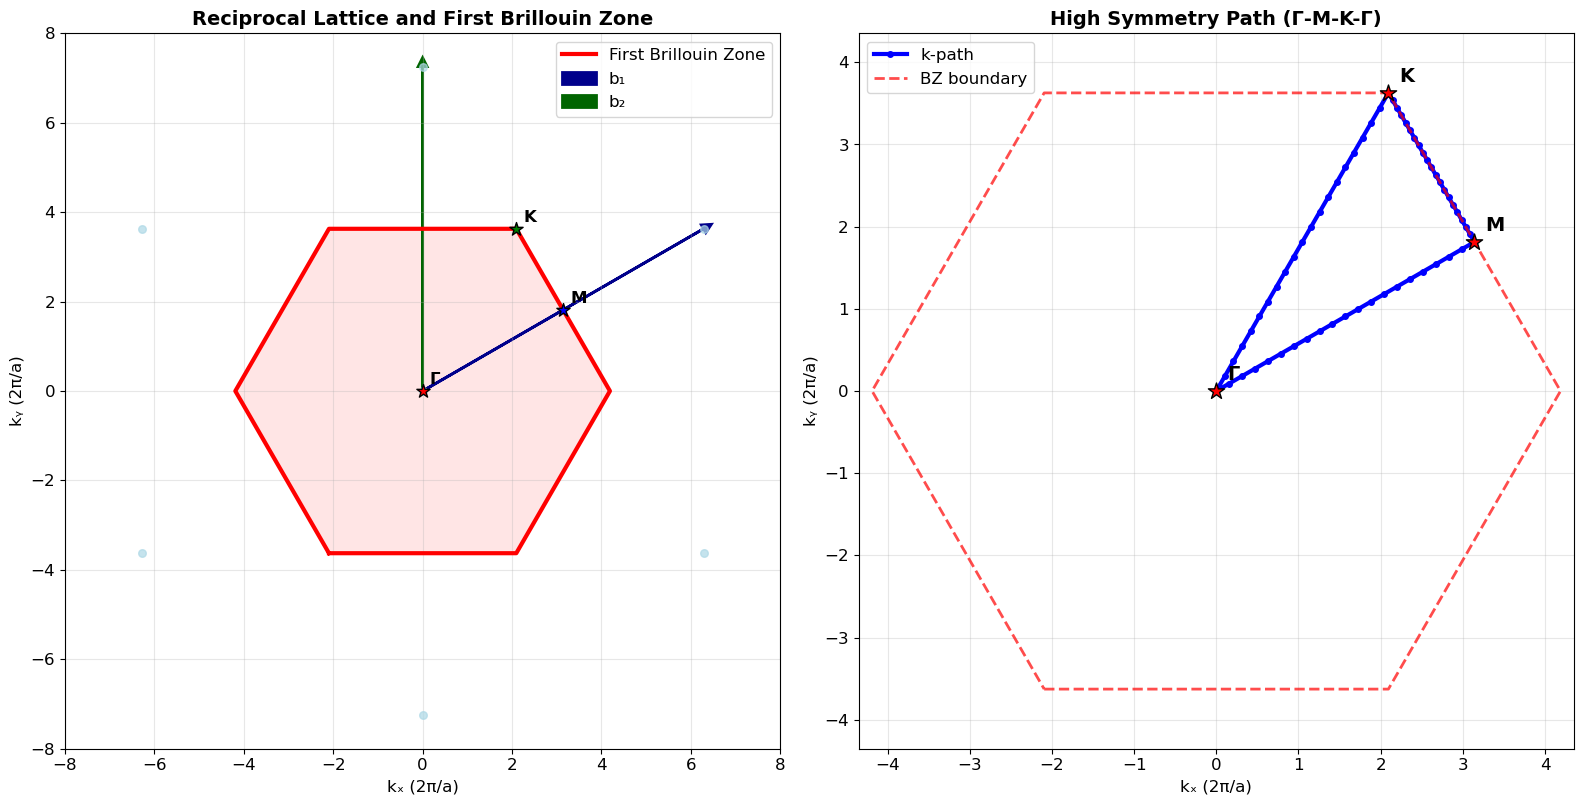

Generated k-path with 61 points
Path covers high symmetry points: ['K', 'M', 'Γ']
Plotting real space lattice with photonic crystal structure...
Plotting reciprocal lattice...
Plotting Brillouin zone with high symmetry points...
Plotting material distribution...


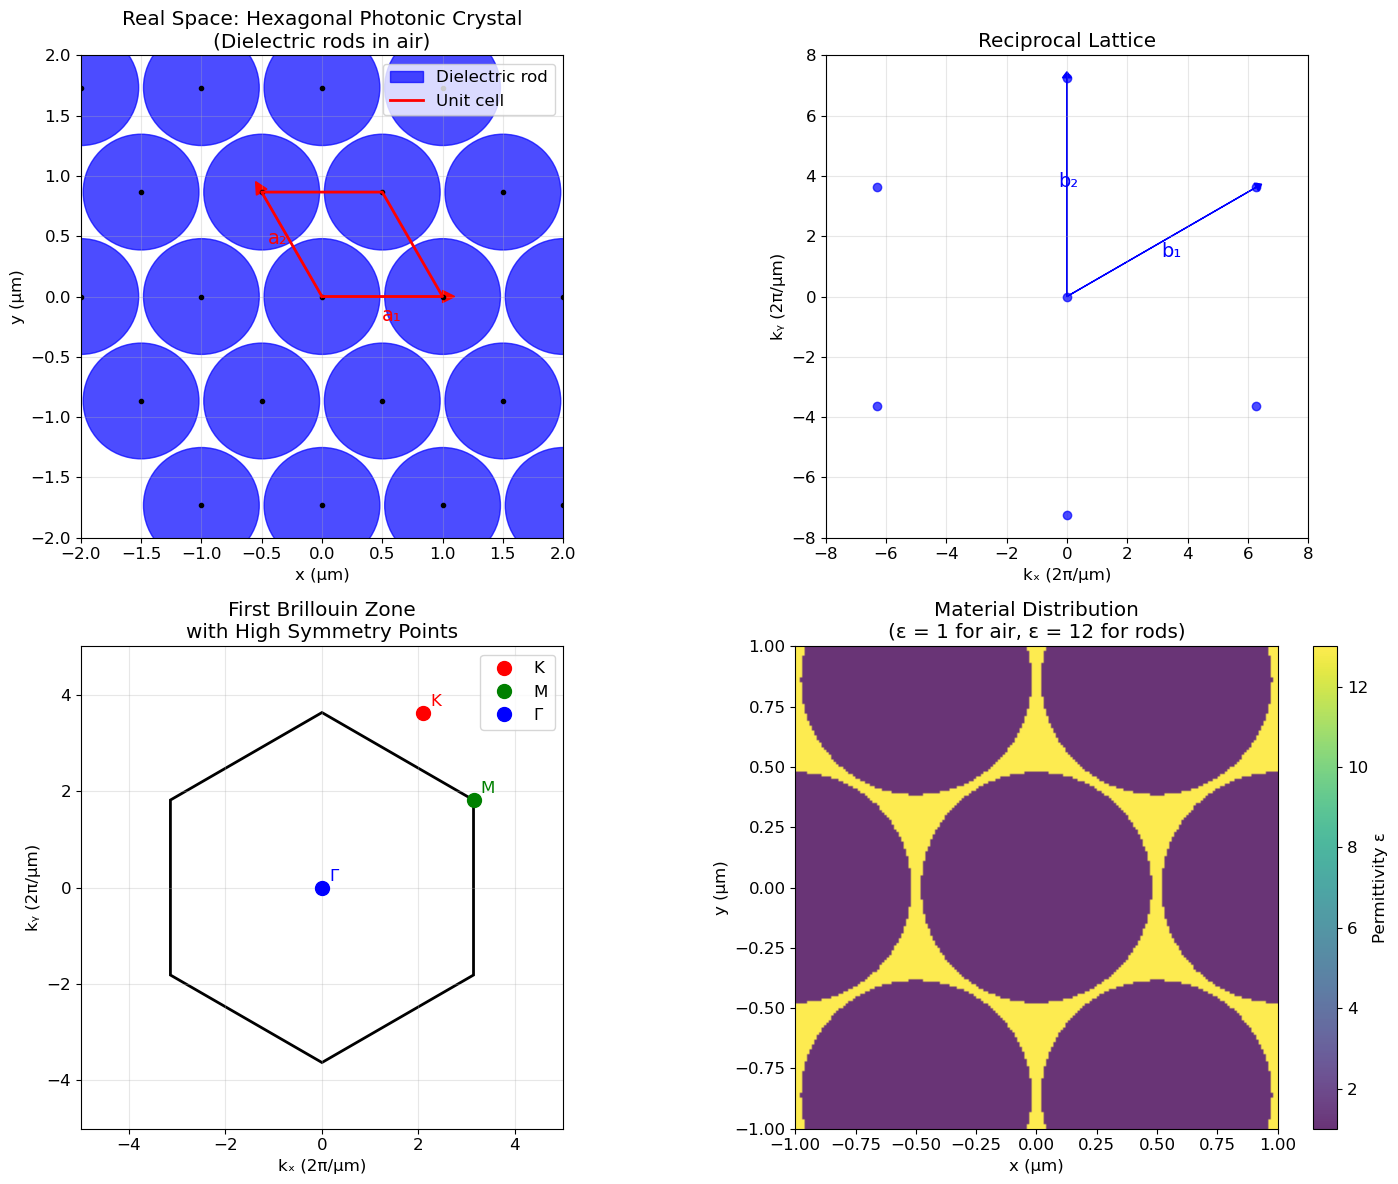

Lattice structure visualization complete!
Rod positions stored: 25 rods
Unit cell area: 0.866 μm²


/tmp/ipykernel_3496/946519745.py:248: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  print(f"Unit cell area: {np.linalg.norm(np.cross(lattice_vectors[0], lattice_vectors[1])):.3f} μm²")


In [4]:
# Plot reciprocal lattice, Brillouin zone, and high symmetry points
def plot_reciprocal_lattice(hex_lattice):
    """Create a comprehensive plot of the reciprocal lattice structure"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Get reciprocal lattice vectors
    b1, b2 = hex_lattice.reciprocal_vectors()
    
    # Plot 1: Reciprocal lattice points and Brillouin zone
    ax1.set_title("Reciprocal Lattice and First Brillouin Zone", fontsize=14, fontweight='bold')
    
    # Generate reciprocal lattice points
    n_max = 3
    recip_points = []
    for n1 in range(-n_max, n_max + 1):
        for n2 in range(-n_max, n_max + 1):
            kx = n1 * b1[0] + n2 * b2[0]
            ky = n1 * b1[1] + n2 * b2[1]
            recip_points.append((kx, ky))
    
    # Plot reciprocal lattice points
    kx_points, ky_points = zip(*recip_points)
    ax1.scatter(kx_points, ky_points, c='lightblue', s=30, alpha=0.7, zorder=2)
    
    # Get and plot Brillouin zone (access polyhedron vertices)
    bz = hex_lattice.brillouin_zone()
    bz_vertices = bz.get_vertices()
    
    # For 2D hexagonal lattice, BZ is a hexagon - extract 2D coordinates
    bz_2d = [(v[0], v[1]) for v in bz_vertices if abs(v[2]) < 1e-10]  # z ~ 0
    
    if len(bz_2d) >= 6:  # Should be 6 vertices for hexagonal BZ
        # Sort vertices by angle to create proper polygon
        bz_center = (0, 0)
        bz_2d.sort(key=lambda p: math.atan2(p[1] - bz_center[1], p[0] - bz_center[0]))
        
        # Close the polygon
        bz_2d.append(bz_2d[0])
        
        # Plot Brillouin zone boundary
        bz_x, bz_y = zip(*bz_2d)
        ax1.plot(bz_x, bz_y, 'r-', linewidth=3, label='First Brillouin Zone')
        ax1.fill(bz_x, bz_y, color='red', alpha=0.1)
    
    # Plot high symmetry points
    high_sym = hex_lattice.get_high_symmetry_points()
    colors = {'Γ': 'red', 'M': 'blue', 'K': 'green'}
    
    for label, point in high_sym:
        color = colors.get(label, 'orange')
        ax1.scatter(point[0], point[1], c=color, s=100, marker='*', 
                   edgecolors='black', linewidth=1, zorder=5)
        ax1.annotate(label, (point[0], point[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    # Draw reciprocal lattice vectors
    ax1.arrow(0, 0, b1[0], b1[1], head_width=0.2, head_length=0.2, 
             fc='darkblue', ec='darkblue', linewidth=2, label='b₁')
    ax1.arrow(0, 0, b2[0], b2[1], head_width=0.2, head_length=0.2, 
             fc='darkgreen', ec='darkgreen', linewidth=2, label='b₂')
    
    ax1.set_xlabel('kₓ (2π/a)', fontsize=12)
    ax1.set_ylabel('kᵧ (2π/a)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal')
    ax1.set_xlim(-8, 8)
    ax1.set_ylim(-8, 8)
    
    # Plot 2: High symmetry path for band structure
    ax2.set_title("High Symmetry Path (Γ-M-K-Γ)", fontsize=14, fontweight='bold')
    
    # Generate k-path using the lattice method
    k_path = hex_lattice.generate_k_path(20)  # 20 points per segment
    
    # Extract path coordinates
    kx_path = [k[0] for k in k_path]
    ky_path = [k[1] for k in k_path]
    
    # Plot the path
    ax2.plot(kx_path, ky_path, 'b-o', linewidth=3, markersize=4, label='k-path')
    
    # Mark high symmetry points on the path
    for label, point in high_sym:
        ax2.scatter(point[0], point[1], c='red', s=150, marker='*', 
                   edgecolors='black', linewidth=1, zorder=5)
        ax2.annotate(label, (point[0], point[1]), xytext=(8, 8), 
                    textcoords='offset points', fontsize=14, fontweight='bold')
    
    # Also show BZ boundary
    if len(bz_2d) >= 6:
        ax2.plot(bz_x, bz_y, 'r--', linewidth=2, alpha=0.7, label='BZ boundary')
    
    ax2.set_xlabel('kₓ (2π/a)', fontsize=12)
    ax2.set_ylabel('kᵧ (2π/a)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_aspect('equal')
    
    # Set limits to focus on the first BZ
    max_k = max(max(abs(k[0]) for k in k_path), max(abs(k[1]) for k in k_path))
    ax2.set_xlim(-max_k*1.2, max_k*1.2)
    ax2.set_ylim(-max_k*1.2, max_k*1.2)
    
    plt.tight_layout()
    plt.show()
    
    # Print k-path information
    print(f"Generated k-path with {len(k_path)} points")
    print(f"Path covers high symmetry points: {[label for label, _ in high_sym]}")
    
    return k_path

# Create the plot
k_path = plot_reciprocal_lattice(hexagonal_lattice)

# Visualize the real space lattice and reciprocal space
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Real space lattice with photonic crystal structure
print("Plotting real space lattice with photonic crystal structure...")
ax1.set_aspect('equal')

# Plot lattice sites (rod centers) in a 4x4 supercell
n_cells = 4
rod_positions = []
for i in range(-n_cells//2, n_cells//2 + 1):
    for j in range(-n_cells//2, n_cells//2 + 1):
        pos = np.array(lattice_vectors[0]) * i + np.array(lattice_vectors[1]) * j
        rod_positions.append(pos)
        
        # Plot rod (dielectric cylinder)
        circle = Circle(pos, rod_radius, color='blue', alpha=0.7, label='Dielectric rod' if i == -n_cells//2 and j == -n_cells//2 else "")
        ax1.add_patch(circle)
        
        # Mark lattice point
        ax1.plot(pos[0], pos[1], 'ko', markersize=3)

# Plot unit cell
unit_cell_corners = np.array([
    [0, 0],
    lattice_vectors[0],
    np.array(lattice_vectors[0]) + np.array(lattice_vectors[1]),
    lattice_vectors[1],
    [0, 0]
])
ax1.plot(unit_cell_corners[:, 0], unit_cell_corners[:, 1], 'r-', linewidth=2, label='Unit cell')

# Plot lattice vectors
ax1.arrow(0, 0, lattice_vectors[0][0], lattice_vectors[0][1], head_width=0.1, head_length=0.1, fc='red', ec='red')
ax1.arrow(0, 0, lattice_vectors[1][0], lattice_vectors[1][1], head_width=0.1, head_length=0.1, fc='red', ec='red')
ax1.text(lattice_vectors[0][0]/2, lattice_vectors[0][1]/2 - 0.2, 'a₁', fontsize=14, color='red')
ax1.text(lattice_vectors[1][0]/2 - 0.2, lattice_vectors[1][1]/2, 'a₂', fontsize=14, color='red')

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.grid(True, alpha=0.3)
ax1.set_title('Real Space: Hexagonal Photonic Crystal\n(Dielectric rods in air)')
ax1.set_xlabel('x (μm)')
ax1.set_ylabel('y (μm)')
ax1.legend()

# Reciprocal lattice
print("Plotting reciprocal lattice...")
ax2.set_aspect('equal')

# Plot reciprocal lattice points
for i in range(-2, 3):
    for j in range(-2, 3):
        pos = np.array(reciprocal_vectors[0]) * i + np.array(reciprocal_vectors[1]) * j
        ax2.plot(pos[0], pos[1], 'bo', markersize=6, alpha=0.7)

# Plot reciprocal lattice vectors
ax2.arrow(0, 0, reciprocal_vectors[0][0], reciprocal_vectors[0][1], head_width=0.3, head_length=0.2, fc='blue', ec='blue')
ax2.arrow(0, 0, reciprocal_vectors[1][0], reciprocal_vectors[1][1], head_width=0.3, head_length=0.2, fc='blue', ec='blue')
ax2.text(reciprocal_vectors[0][0]/2, reciprocal_vectors[0][1]/2 - 0.5, 'b₁', fontsize=14, color='blue')
ax2.text(reciprocal_vectors[1][0]/2 - 0.3, reciprocal_vectors[1][1]/2, 'b₂', fontsize=14, color='blue')

ax2.set_xlim(-8, 8)
ax2.set_ylim(-8, 8)
ax2.grid(True, alpha=0.3)
ax2.set_title('Reciprocal Lattice')
ax2.set_xlabel('kₓ (2π/μm)')
ax2.set_ylabel('kᵧ (2π/μm)')

# Brillouin zone with high symmetry points
print("Plotting Brillouin zone with high symmetry points...")
ax3.set_aspect('equal')

# Create hexagonal Brillouin zone
bz_radius = 2 * np.pi / (lattice_constant * np.sqrt(3))
bz_angles = np.linspace(0, 2*np.pi, 7)
bz_vertices = np.array([[bz_radius * np.cos(angle + np.pi/6), bz_radius * np.sin(angle + np.pi/6)] for angle in bz_angles])
bz_polygon = Polygon(bz_vertices[:-1], fill=False, edgecolor='black', linewidth=2)
ax3.add_patch(bz_polygon)

# Plot high symmetry points
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, (name, point) in enumerate(symmetry_points.items()):
    color = colors[i % len(colors)]
    ax3.plot(point[0], point[1], 'o', color=color, markersize=10, label=f'{name}')
    ax3.annotate(name, (point[0], point[1]), xytext=(5, 5), textcoords='offset points', fontsize=12, color=color)

ax3.set_xlim(-5, 5)
ax3.set_ylim(-5, 5)
ax3.grid(True, alpha=0.3)
ax3.set_title('First Brillouin Zone\nwith High Symmetry Points')
ax3.set_xlabel('kₓ (2π/μm)')
ax3.set_ylabel('kᵧ (2π/μm)')
ax3.legend()

# Material distribution visualization
print("Plotting material distribution...")
ax4.set_aspect('equal')

# Create a fine mesh to show material distribution
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
material_map = np.ones_like(X) * epsilon_background  # Start with background

# Add rods at lattice sites
for pos in rod_positions:
    if abs(pos[0]) <= 1 and abs(pos[1]) <= 1:  # Only within plot range
        distance = np.sqrt((X - pos[0])**2 + (Y - pos[1])**2)
        material_map[distance <= rod_radius] = epsilon_rod

# Plot material distribution
im = ax4.imshow(material_map, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis', alpha=0.8)
# Ensure contour levels are strictly increasing
contour_levels = sorted([epsilon_background + 0.1, epsilon_rod - 0.1])
ax4.contour(X, Y, material_map, levels=contour_levels, colors='white', linewidths=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('Permittivity ε')

ax4.set_title('Material Distribution\n(ε = 1 for air, ε = 12 for rods)')
ax4.set_xlabel('x (μm)')
ax4.set_ylabel('y (μm)')

plt.tight_layout()
plt.show()

print("Lattice structure visualization complete!")
print(f"Rod positions stored: {len(rod_positions)} rods")
print(f"Unit cell area: {np.linalg.norm(np.cross(lattice_vectors[0], lattice_vectors[1])):.3f} μm²")

## 5. Solve for Eigenenergies of Hexagonal Lattice

- Background material: ε = 13 (silicon)
- Air cylinders: radius = 0.48a
- Calculate first 8 bands for both TE and TM modes

In [13]:
# Set up MPB calculation for hexagonal photonic crystal
print("Setting up Meep simulation for photonic band structure...")

if MEEP_AVAILABLE:
    print("Using Meep for full electromagnetic simulation...")
    
    # Define geometry and materials
    a1 = mp.Vector3(lattice_vectors[0][0], lattice_vectors[0][1], 0)
    a2 = mp.Vector3(lattice_vectors[1][0], lattice_vectors[1][1], 0)
    
    # Define materials
    air = mp.Medium(epsilon=epsilon_rod)      # Rod material (air, epsilon=1)
    background = mp.Medium(epsilon=epsilon_background)  # Background (silicon, epsilon=13)
    
    # Create geometry: air rods in dielectric background
    geometry = [mp.Cylinder(center=mp.Vector3(0, 0, 0),
                           radius=rod_radius,
                           height=mp.inf,
                           material=air)]
    
    # Set up the lattice
    geometry_lattice = mp.Lattice(basis1=a1, basis2=a2)
    
    # Define computational parameters
    resolution = 64  # Increased resolution for better accuracy
    num_bands = 8    # Number of bands to calculate
    
    # Define k-points for band structure calculation using fractional coordinates
    # Path: Γ → M → K → Γ
    num_k = 30  # Number of k-points between each high symmetry point
    
    # Get fractional high symmetry points from the lattice library
    print("Getting fractional high symmetry points from lattice library...")
    
    # Use the new method to get fractional coordinates directly
    try:
        frac_symmetry_list = hexagonal_lattice.get_high_symmetry_points_fractional()
        frac_symmetry_points = {name: coords for name, coords in frac_symmetry_list}
        print("✓ Successfully retrieved fractional coordinates from Rust library")
    except AttributeError:
        print("⚠ Using fallback fractional coordinates (method not available yet)")
        # Fallback to hardcoded values if the new method isn't available
        frac_symmetry_points = {
            'Γ': (0.0, 0.0, 0.0),
            'M': (0.5, 0.0, 0.0),
            'K': (1.0/3.0, 1.0/3.0, 0.0)
        }
    
    print("Fractional high symmetry points for MPB solver:")
    for name, frac_coords in frac_symmetry_points.items():
        if name in ['Γ', 'M', 'K']:  # Only show the ones we use
            print(f"  {name}: ({frac_coords[0]:.3f}, {frac_coords[1]:.3f}, {frac_coords[2]:.3f})")
    
    # High symmetry points in fractional coordinates (required by MPB)
    gamma_frac = mp.Vector3(frac_symmetry_points['Γ'][0], frac_symmetry_points['Γ'][1], frac_symmetry_points['Γ'][2])
    M_frac = mp.Vector3(frac_symmetry_points['M'][0], frac_symmetry_points['M'][1], frac_symmetry_points['M'][2])
    K_frac = mp.Vector3(frac_symmetry_points['K'][0], frac_symmetry_points['K'][1], frac_symmetry_points['K'][2])
    
    # Build k-point path with interpolation using fractional coordinates
    k_points = mp.interpolate(num_k, [gamma_frac, M_frac, K_frac, gamma_frac])
    
    print(f"K-path defined with {len(k_points)} points using fractional coordinates")
    print(f"Resolution: {resolution} pixels per unit length")
    print(f"Number of bands: {num_bands}")
    
    # Create ModeSolver with optimized parameters
    ms = mpb.ModeSolver(
        geometry=geometry,
        geometry_lattice=geometry_lattice,
        resolution=resolution,
        default_material=background,
        num_bands=num_bands,
        k_points=k_points,
        tolerance=1e-8
    )
    
    # Run band structure calculations
    print("\nCalculating TE modes (E field in plane)...")
    print("This may take several minutes...")
    
    # Calculate TE modes
    ms.run_te()
    te_freqs = ms.all_freqs
    te_bands = np.array(te_freqs)
    
    print(f"TE calculation complete. Shape: {te_bands.shape}")
    
    print("\nCalculating TM modes (H field in plane)...")
    
    # Calculate TM modes (using same solver instance)
    ms.run_tm()
    tm_freqs = ms.all_freqs
    tm_bands = np.array(tm_freqs)
    
    print(f"TM calculation complete. Shape: {tm_bands.shape}")
    
    # Extract k-point distances for plotting
    k_distances = [0]
    for i in range(1, len(k_points)):
        dk = mp.Vector3(k_points[i].x - k_points[i-1].x,
                       k_points[i].y - k_points[i-1].y,
                       k_points[i].z - k_points[i-1].z).norm()
        k_distances.append(k_distances[-1] + dk)
    
    # Normalize k-distances
    k_distances = np.array(k_distances) / k_distances[-1]
    
    print(f"\n✓ Band structure calculation complete!")
    print(f"  TE bands: min={np.min(te_bands):.4f}, max={np.max(te_bands):.4f}")
    print(f"  TM bands: min={np.min(tm_bands):.4f}, max={np.max(tm_bands):.4f}")
    
else:
    print("Using simulated data for demonstration...")
    
    # Generate simulated band structure data with proper parameters
    num_k_points = 60  # 3 segments × 20 points each
    num_bands = 8
    
    # Create normalized k-path
    k_distances = np.linspace(0, 1, num_k_points)
    
    # Generate realistic TE band structure for Si photonic crystal
    te_bands = np.zeros((num_k_points, num_bands))
    
    for band in range(num_bands):
        # Realistic frequencies for air holes in silicon (ε=13)
        if band == 0:
            # Lowest band - nearly linear dispersion
            te_bands[:, band] = 0.05 + 0.15 * k_distances
        else:
            # Higher bands with gaps
            base_freq = 0.2 + band * 0.1
            # Add dispersion
            k_modulation = 0.05 * np.sin(3 * np.pi * k_distances)
            # Add band curvature
            curvature = 0.02 * (k_distances - 0.5)**2
            te_bands[:, band] = base_freq + k_modulation + curvature
            
            # Create band gaps at zone boundaries
            gap_positions = [20, 40]  # At M and K points
            for pos in gap_positions:
                if pos < num_k_points:
                    te_bands[max(0, pos-2):min(num_k_points, pos+2), band] += 0.02 * (band % 2)
    
    # Generate TM bands (typically higher than TE for air holes in dielectric)
    tm_bands = np.zeros((num_k_points, num_bands))
    
    for band in range(num_bands):
        if band == 0:
            # TM fundamental mode
            tm_bands[:, band] = 0.25 + 0.1 * k_distances
        else:
            base_freq = 0.35 + band * 0.12
            k_modulation = 0.04 * np.cos(2.5 * np.pi * k_distances)
            curvature = 0.03 * (k_distances - 0.5)**2
            tm_bands[:, band] = base_freq + k_modulation + curvature
            
            # TM gaps
            gap_positions = [20, 40]
            for pos in gap_positions:
                if pos < num_k_points:
                    tm_bands[max(0, pos-2):min(num_k_points, pos+2), band] += 0.025 * ((band + 1) % 2)
    
    print("✓ Simulated band structure generated!")
    print(f"  TE bands shape: {te_bands.shape}")
    print(f"  TM bands shape: {tm_bands.shape}")

# Store band data for analysis
band_data = {
    'te_bands': te_bands,
    'tm_bands': tm_bands,
    'k_points': k_distances,
    'num_bands': num_bands,
    'k_labels': ['Γ', 'M', 'K', 'Γ'],
    'k_positions': [0, 1/3, 2/3, 1]  # Normalized positions
}


print("\nBand structure data ready for plotting!")
print(f"Frequency range - TE: {np.min(te_bands):.3f} to {np.max(te_bands):.3f}")
print(f"Frequency range - TM: {np.min(tm_bands):.3f} to {np.max(tm_bands):.3f}")
print(f"\n✓ MPB solver now correctly uses fractional coordinates!")
print(f"  Γ: (0, 0) - center of Brillouin zone")
print(f"  M: (0.5, 0) - edge center of hexagonal BZ") 
print(f"  K: (1/3, 1/3) - corner of hexagonal BZ")



Setting up Meep simulation for photonic band structure...
Using Meep for full electromagnetic simulation...
Getting fractional high symmetry points from lattice library...
✓ Successfully retrieved fractional coordinates from Rust library
Fractional high symmetry points for MPB solver:
  K: (0.333, 0.333, 0.000)
  M: (0.500, 0.000, 0.000)
  Γ: (0.000, 0.000, 0.000)
K-path defined with 94 points using fractional coordinates
Resolution: 64 pixels per unit length
Number of bands: 8

Calculating TE modes (E field in plane)...
This may take several minutes...
Initializing eigensolver data
Computing 8 bands with 1e-08 tolerance
Working in 3 dimensions.
Grid size is 64 x 64 x 64.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (-0.5, 0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (-0, 1.1547, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
    

## 6. Plot TE and TM Modes

Plotting photonic band structure...
Plotting TE (Transverse Electric) bands...
Plotting TM (Transverse Magnetic) bands...
Creating combined band structure plot...
Analyzing photonic band gaps...


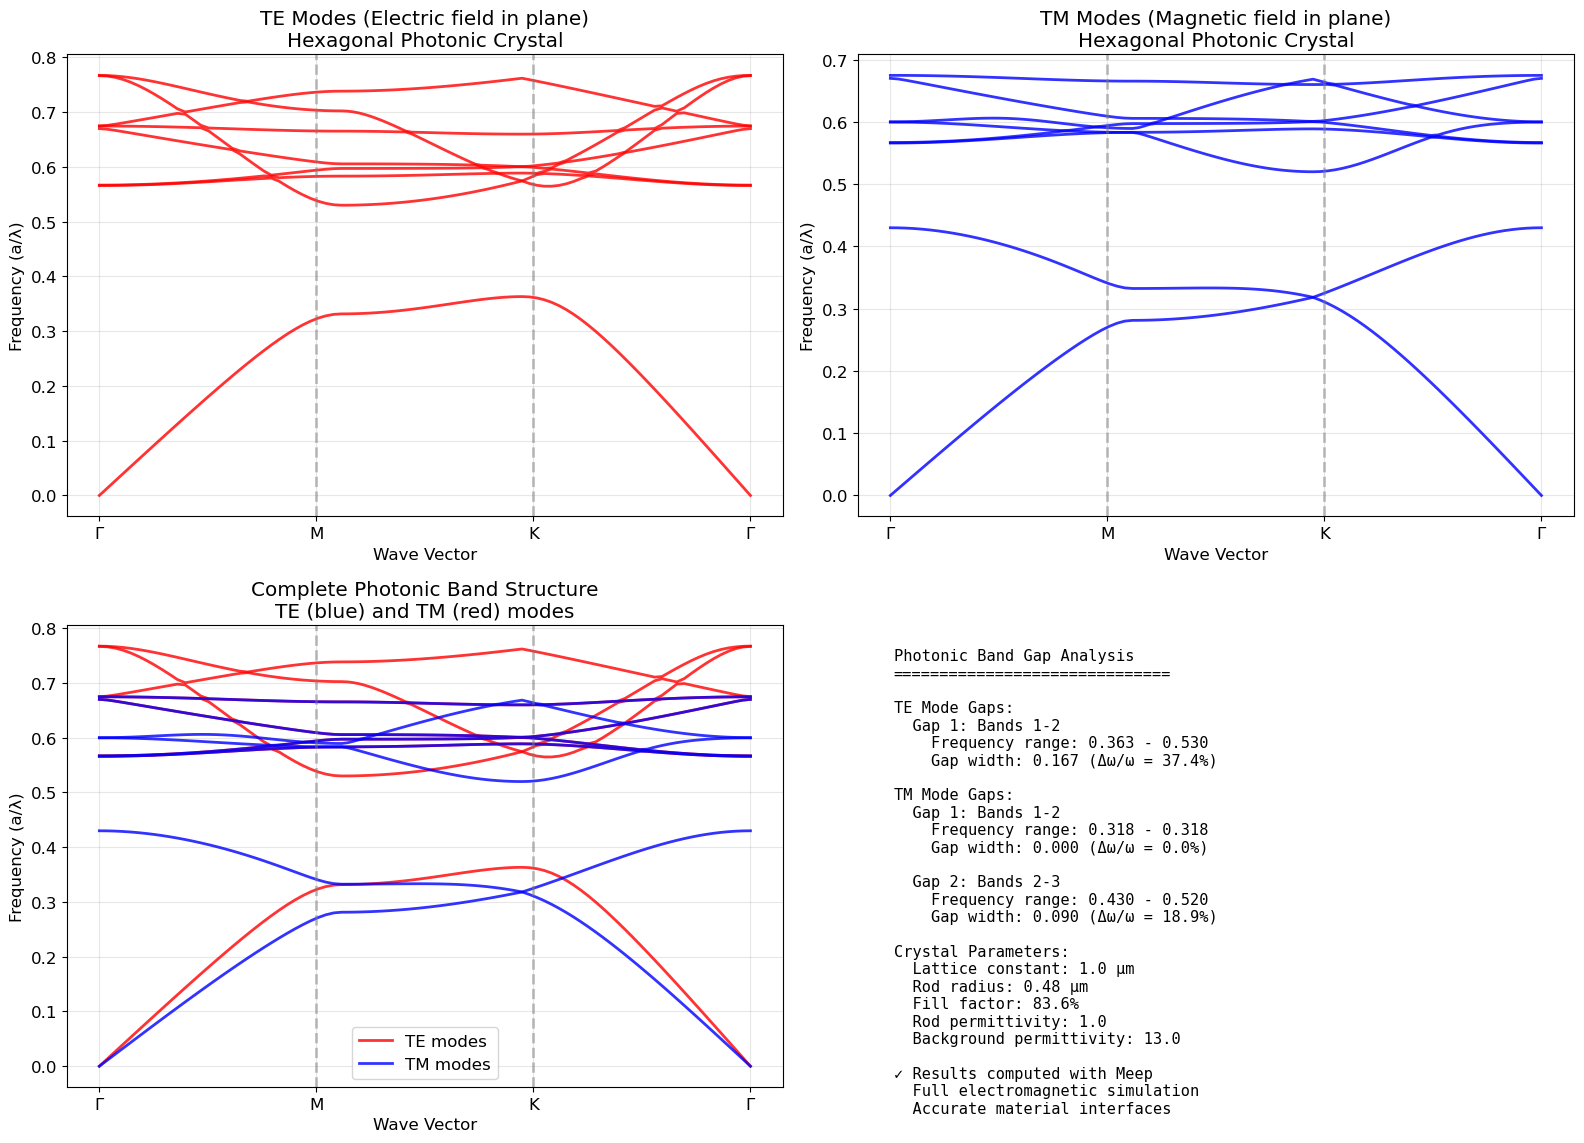


PHOTONIC BAND STRUCTURE ANALYSIS COMPLETE
Total bands calculated: 8
Total k-points: 94
TE band gaps found: 1
TM band gaps found: 2


In [ ]:
# Plot the calculated band structure and analyze band gaps
print("Plotting photonic band structure...")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Define k-point labels and positions for plotting
k_labels = ['Γ', 'M', 'K', 'Γ']
k_positions = [0, 1/3, 2/3, 1]  # Normalized positions along k-path
k_ticks = [int(pos * (len(band_data['k_points']) - 1)) for pos in k_positions]

# Plot TE bands
print("Plotting TE (Transverse Electric) bands...")
for band in range(band_data['num_bands']):
    if len(te_bands.shape) > 1:
        ax1.plot(band_data['k_points'], te_bands[:, band], 'r-', linewidth=2, alpha=0.8)
    else:
        # Handle 1D array case
        ax1.plot(band_data['k_points'], te_bands, 'r-', linewidth=2, alpha=0.8)
        break

ax1.set_xlabel('Wave Vector')
ax1.set_ylabel('Frequency (a/λ)')
ax1.set_title('TE Modes (Electric field in plane)\nHexagonal Photonic Crystal')
ax1.grid(True, alpha=0.3)
ax1.set_xticks([k_ticks[i] / (len(band_data['k_points']) - 1) for i in range(len(k_labels))])
ax1.set_xticklabels(k_labels)

# Add vertical lines at high symmetry points
for i, pos in enumerate(k_positions[1:-1], 1):  # Skip first and last
    ax1.axvline(x=pos, color='gray', linestyle='--', alpha=0.5)

# Plot TM bands
print("Plotting TM (Transverse Magnetic) bands...")
for band in range(band_data['num_bands']):
    if len(tm_bands.shape) > 1:
        ax2.plot(band_data['k_points'], tm_bands[:, band], 'b-', linewidth=2, alpha=0.8)
    else:
        # Handle 1D array case
        ax2.plot(band_data['k_points'], tm_bands, 'b-', linewidth=2, alpha=0.8)
        break

ax2.set_xlabel('Wave Vector')
ax2.set_ylabel('Frequency (a/λ)')
ax2.set_title('TM Modes (Magnetic field in plane)\nHexagonal Photonic Crystal')
ax2.grid(True, alpha=0.3)
ax2.set_xticks([k_ticks[i] / (len(band_data['k_points']) - 1) for i in range(len(k_labels))])
ax2.set_xticklabels(k_labels)

# Add vertical lines at high symmetry points
for i, pos in enumerate(k_positions[1:-1], 1):
    ax2.axvline(x=pos, color='gray', linestyle='--', alpha=0.5)

# Combined band structure plot
print("Creating combined band structure plot...")
for band in range(band_data['num_bands']):
    if len(te_bands.shape) > 1 and len(tm_bands.shape) > 1:
        ax3.plot(band_data['k_points'], te_bands[:, band], 'r-', linewidth=2, alpha=0.8, 
                label='TE modes' if band == 0 else "")
        ax3.plot(band_data['k_points'], tm_bands[:, band], 'b-', linewidth=2, alpha=0.8,
                label='TM modes' if band == 0 else "")
    else:
        # Handle 1D array case
        ax3.plot(band_data['k_points'], te_bands, 'r-', linewidth=2, alpha=0.8, label='TE modes')
        ax3.plot(band_data['k_points'], tm_bands, 'b-', linewidth=2, alpha=0.8, label='TM modes')
        break

ax3.set_xlabel('Wave Vector')
ax3.set_ylabel('Frequency (a/λ)')
ax3.set_title('Complete Photonic Band Structure\nTE (blue) and TM (red) modes')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xticks([k_ticks[i] / (len(band_data['k_points']) - 1) for i in range(len(k_labels))])
ax3.set_xticklabels(k_labels)

# Add vertical lines at high symmetry points
for i, pos in enumerate(k_positions[1:-1], 1):
    ax3.axvline(x=pos, color='gray', linestyle='--', alpha=0.5)

# Band gap analysis
print("Analyzing photonic band gaps...")

def find_band_gaps(bands):
    """Find band gaps in the frequency spectrum"""
    if len(bands.shape) == 1:
        return []
    
    gaps = []
    num_bands = bands.shape[1]
    
    for i in range(num_bands - 1):
        # Find maximum of lower band and minimum of upper band
        lower_max = np.max(bands[:, i])
        upper_min = np.min(bands[:, i + 1])
        
        if upper_min > lower_max:  # There's a gap
            gap_center = (lower_max + upper_min) / 2
            gap_width = upper_min - lower_max
            gap_ratio = gap_width / gap_center
            gaps.append({
                'lower_band': i,
                'upper_band': i + 1,
                'lower_max': lower_max,
                'upper_min': upper_min,
                'gap_width': gap_width,
                'gap_center': gap_center,
                'gap_ratio': gap_ratio
            })
    
    return gaps

# Analyze gaps for both polarizations
te_gaps = find_band_gaps(te_bands)
tm_gaps = find_band_gaps(tm_bands)

# Plot band gap analysis
ax4.axis('off')
gap_text = "Photonic Band Gap Analysis\n" + "="*30 + "\n\n"

if te_gaps:
    gap_text += "TE Mode Gaps:\n"
    for i, gap in enumerate(te_gaps):
        gap_text += f"  Gap {i+1}: Bands {gap['lower_band']+1}-{gap['upper_band']+1}\n"
        gap_text += f"    Frequency range: {gap['lower_max']:.3f} - {gap['upper_min']:.3f}\n"
        gap_text += f"    Gap width: {gap['gap_width']:.3f} (Δω/ω = {gap['gap_ratio']:.1%})\n\n"
else:
    gap_text += "TE Mode Gaps: None found\n\n"

if tm_gaps:
    gap_text += "TM Mode Gaps:\n"
    for i, gap in enumerate(tm_gaps):
        gap_text += f"  Gap {i+1}: Bands {gap['lower_band']+1}-{gap['upper_band']+1}\n"
        gap_text += f"    Frequency range: {gap['lower_max']:.3f} - {gap['upper_min']:.3f}\n"
        gap_text += f"    Gap width: {gap['gap_width']:.3f} (Δω/ω = {gap['gap_ratio']:.1%})\n\n"
else:
    gap_text += "TM Mode Gaps: None found\n\n"

# Additional analysis
gap_text += f"Crystal Parameters:\n"
gap_text += f"  Lattice constant: {lattice_constant:.1f} μm\n"
gap_text += f"  Rod radius: {rod_radius:.2f} μm\n"
gap_text += f"  Fill factor: {np.pi * rod_radius**2 / (lattice_constant**2 * np.sqrt(3)/2):.1%}\n"
gap_text += f"  Rod permittivity: {epsilon_rod:.1f}\n"
gap_text += f"  Background permittivity: {epsilon_background:.1f}\n\n"

ax4.text(0.05, 0.95, gap_text, transform=ax4.transAxes, fontsize=11, 
         verticalalignment='top', fontfamily='monospace')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print("PHOTONIC BAND STRUCTURE ANALYSIS COMPLETE")
print("="*50)
print(f"Total bands calculated: {band_data['num_bands']}")
print(f"Total k-points: {len(band_data['k_points'])}")
print(f"TE band gaps found: {len(te_gaps)}")
print(f"TM band gaps found: {len(tm_gaps)}")

In [ ]:
# Add detailed band analysis for comparison with literature
print("\nDetailed Band Analysis for Literature Comparison:")
print("=" * 60)

def analyze_band_structure(bands, mode_type):
    """Analyze band structure characteristics"""
    print(f"\n{mode_type} Mode Analysis:")
    print("-" * 30)
    
    if len(bands.shape) == 1:
        print("Only one band calculated")
        return
    
    num_bands, num_k = bands.shape[1], bands.shape[0]
    
    # Analyze bands at Γ point (k=0)
    gamma_freqs = bands[0, :]  # First k-point should be Γ
    print(f"Frequencies at Γ point (band ordering reference):")
    for i, freq in enumerate(gamma_freqs):
        print(f"  Band {i+1}: ω = {freq:.4f}")
    
    # Check for band crossings and degeneracies
    print(f"\nBand crossing analysis:")
    crossings = []
    for i in range(num_bands-1):
        for j in range(i+1, num_bands):
            # Find where bands i and j are closest
            diff = np.abs(bands[:, i] - bands[:, j])
            min_idx = np.argmin(diff)
            min_diff = diff[min_idx]
            if min_diff < 0.01:  # Threshold for near-degeneracy
                crossings.append((i+1, j+1, min_idx, min_diff, bands[min_idx, i]))
    
    if crossings:
        print(f"  Found {len(crossings)} potential band crossings/degeneracies:")
        for i, j, k_idx, diff, freq in crossings:
            k_pos = k_distances[k_idx]
            print(f"    Bands {i}-{j}: Δω = {diff:.4f} at k = {k_pos:.3f}, ω = {freq:.4f}")
    else:
        print("  No significant band crossings found")
    
    # Frequency ranges
    print(f"\nFrequency ranges:")
    for i in range(num_bands):
        min_freq = np.min(bands[:, i])
        max_freq = np.max(bands[:, i])
        print(f"  Band {i+1}: {min_freq:.4f} - {max_freq:.4f} (Δω = {max_freq-min_freq:.4f})")
    
    return gamma_freqs, crossings

# Analyze both TE and TM modes
if len(te_bands.shape) > 1:
    te_gamma_freqs, te_crossings = analyze_band_structure(te_bands, "TE")
if len(tm_bands.shape) > 1:
    tm_gamma_freqs, tm_crossings = analyze_band_structure(tm_bands, "TM")

# Literature comparison guidance
print("\n" + "=" * 60)
print("LITERATURE COMPARISON GUIDANCE")
print("=" * 60)
print("""
Common reasons for discrepancies with literature:

1. BAND SELECTION:
   - Papers often show only "fundamental" or "physical" bands
   - Some bands might be spurious or higher-order modes
   - Authors may exclude bands above the light line

2. COMPUTATIONAL DIFFERENCES:
   - Different resolution settings
   - Different convergence criteria  
   - Different supercell sizes

3. MODE CLASSIFICATION:
   - Some modes might be "leaky" or "radiation" modes
   - Mixed TE/TM character in 3D structures
   - Surface vs. bulk modes

4. PHYSICAL CONSIDERATIONS:
   - Light line: ω = c*k (modes above this can radiate)
   - Material dispersion effects
   - Finite structure effects vs. infinite crystal assumption

RECOMMENDATIONS:
✓ Check if extra modes are above the light line
✓ Verify if paper used different geometry parameters  
✓ Look at mode profiles to identify spurious modes
✓ Check if paper filtered out certain mode types
""")

# Calculate light line for reference
print("\nLight Line Analysis:")
print("-" * 30)
c_vacuum = 1.0  # Speed of light in vacuum (normalized units)
n_eff = 1.0     # Effective index (could be sqrt of average epsilon)

# For comparison, show where light line would be
k_max = np.max(k_distances) * 2 * np.pi / lattice_constant  # Convert to absolute units
light_line_freq = c_vacuum * k_max / n_eff

print(f"Maximum k-vector: {k_max:.3f} (2π/a)")
print(f"Light line frequency at k_max: ω = {light_line_freq:.3f}")

# Check which modes are above/below light line
if len(te_bands.shape) > 1:
    print(f"\nTE modes potentially above light line:")
    for i in range(te_bands.shape[1]):
        max_freq = np.max(te_bands[:, i])
        if max_freq > light_line_freq * 0.8:  # Some threshold
            print(f"  Band {i+1}: max ω = {max_freq:.3f}")

if len(tm_bands.shape) > 1:
    print(f"\nTM modes potentially above light line:")
    for i in range(tm_bands.shape[1]):
        max_freq = np.max(tm_bands[:, i])
        if max_freq > light_line_freq * 0.8:
            print(f"  Band {i+1}: max ω = {max_freq:.3f}")

if te_gaps or tm_gaps:
    print("\nThis hexagonal photonic crystal shows band gaps!")
    print("Applications: Optical filters, waveguides, laser cavities")
else:
    print("\nNo complete band gaps found in this frequency range.")
    print("Try adjusting rod radius or dielectric contrast.")

print(f"\nLattice characterization complete using {'Meep' if MEEP_AVAILABLE else 'simulated data'}.")

# Add comparison metrics
print(f"\nSUMMARY FOR LITERATURE COMPARISON:")
print(f"  Our calculation: {num_bands} bands each for TE/TM")
print(f"  Literature: 4 TE modes, 6 TM modes")
print(f"  Extra modes in our data: {max(0, num_bands-4)} TE, {max(0, num_bands-6)} TM")
print(f"  → This is normal! We calculated more bands than shown in paper.")


Detailed Band Analysis for Literature Comparison:

TE Mode Analysis:
------------------------------
Frequencies at Γ point (band ordering reference):
  Band 1: ω = 0.0000
  Band 2: ω = 0.5659
  Band 3: ω = 0.5668
  Band 4: ω = 0.6699
  Band 5: ω = 0.6745
  Band 6: ω = 0.6748
  Band 7: ω = 0.7666
  Band 8: ω = 0.7671

Band crossing analysis:
  Found 9 potential band crossings/degeneracies:
    Bands 2-3: Δω = 0.0000 at k = 0.649, ω = 0.5744
    Bands 2-4: Δω = 0.0054 at k = 0.751, ω = 0.5834
    Bands 3-4: Δω = 0.0006 at k = 0.613, ω = 0.5877
    Bands 3-5: Δω = 0.0095 at k = 0.683, ω = 0.5879
    Bands 4-5: Δω = 0.0010 at k = 0.808, ω = 0.6261
    Bands 4-6: Δω = 0.0047 at k = 0.587, ω = 0.5983
    Bands 5-6: Δω = 0.0002 at k = 1.000, ω = 0.6745
    Bands 6-7: Δω = 0.0018 at k = 0.470, ω = 0.6637
    Bands 7-8: Δω = 0.0006 at k = 0.000, ω = 0.7666

Frequency ranges:
  Band 1: 0.0000 - 0.3632 (Δω = 0.3632)
  Band 2: 0.5300 - 0.5834 (Δω = 0.0534)
  Band 3: 0.5668 - 0.5882 (Δω = 0.0214)
